In [15]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/Clasificadas/gato\\dog\\dog.0.jpg'

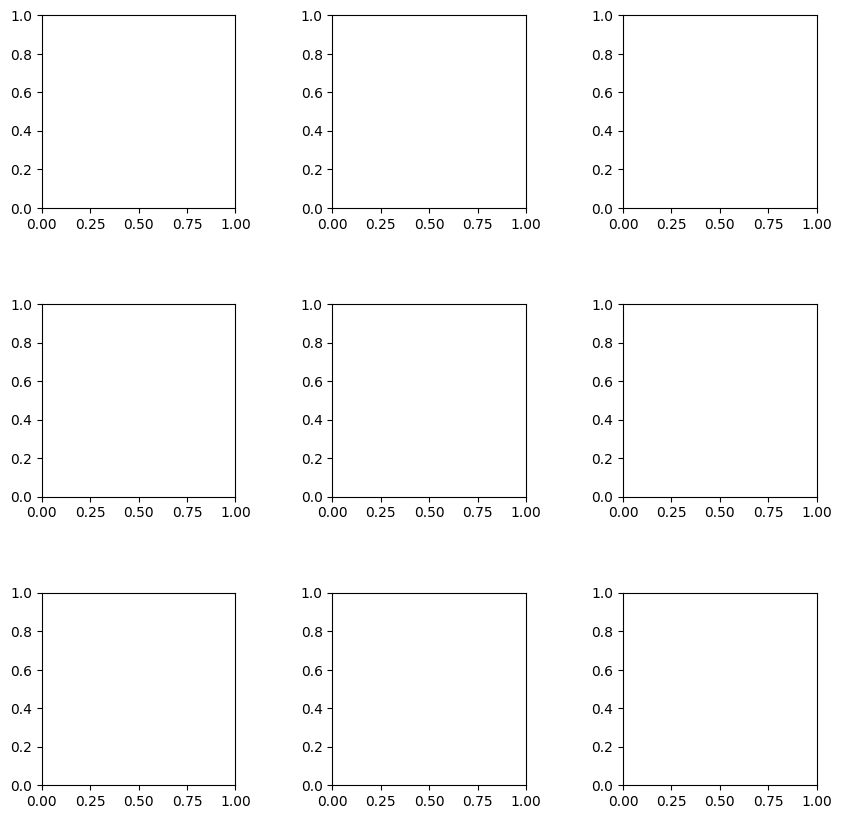

In [29]:
# Ruta a la carpeta que contiene las imágenes de perros y gatos
target_folder = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/Clasificadas/gato"

def show_images(folder, label):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axes = axes.ravel()
    for i in range(9):
        img_path = os.path.join(folder, label, f"{label}.{i}.jpg")
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.show()
    
# Mostrar las primeras 9 imágenes de perros
show_images(target_folder, "dog")

# Mostrar las primeras 9 imágenes de gatos
show_images(target_folder, "cat")

In [6]:
import os
import shutil

# Ruta a la carpeta que contiene las imágenes sin clasificar
source_folder = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/train"

# Ruta a la carpeta donde deseas organizar las imágenes clasificadas
target_folder = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/Clasificadas"

# Crear subdirectorios para las clases
classes = ["perro", "gato"]
for class_name in classes:
    class_folder = os.path.join(target_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)

# Recorrer todas las imágenes en la carpeta sin clasificar
for filename in os.listdir(source_folder):
    # Verificar si el archivo es una imagen
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Determinar la clase basada en el nombre del archivo
        if "dog" in filename:
            class_name = "perro"
        elif "cat" in filename:
            class_name = "gato"
        else:
            continue  # Saltar el archivo si no contiene "dog" o "cat" en el nombre
        # Mover el archivo a la carpeta correspondiente
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(target_folder, class_name, filename)
        shutil.move(source_path, target_path)

print("Imágenes clasificadas correctamente.")

Imágenes clasificadas correctamente.


In [7]:
# Definir la ruta a la carpeta que contiene los datos de entrenamiento y prueba
train_folder = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/Clasificadas"
test_folder = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Tutorial de Clasficador de Imagenes/Data/Raw/test1"

# Crear un generador de datos para preprocesamiento de imágenes con redimensionamiento
data_generator = ImageDataGenerator(
    rescale=1./255,             # Escalar los valores de los píxeles al rango [0,1]
    validation_split=0.2,       # Proporción de datos a utilizar para validación
    preprocessing_function=lambda x: tf.image.resize(x, [200, 200])  # Redimensionar imágenes a 200x200 píxeles
)

# Configurar el generador de datos de entrenamiento y validación
train_data_generator = data_generator.flow_from_directory(
    directory=train_folder,
    target_size=(200, 200),     # Redimensionar todas las imágenes a 200x200 píxeles
    batch_size=32,              # Tamaño del lote
    class_mode='binary',        # Modo de clasificación: 'binary' para dos clases
    subset='training'           # Subconjunto de datos: 'training' para entrenamiento
)

validation_data_generator = data_generator.flow_from_directory(
    directory=train_folder,
    target_size=(200, 200),     # Redimensionar todas las imágenes a 200x200 píxeles
    batch_size=32,              # Tamaño del lote
    class_mode='binary',        # Modo de clasificación: 'binary' para dos clases
    subset='validation'         # Subconjunto de datos: 'validation' para validación
)

# Mostrar el número de imágenes de entrenamiento y validación
print("Número de imágenes de entrenamiento:", len(train_data_generator))
print("Número de imágenes de validación:", len(validation_data_generator))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Número de imágenes de entrenamiento: 625
Número de imágenes de validación: 157


In [8]:


# Definir el modelo
model = models.Sequential([
    # Capa de convolución 2D con 32 filtros, función de activación ReLU y tamaño del kernel 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    # Capa de agrupación máxima con tamaño de ventana 2x2
    layers.MaxPooling2D((2, 2)),
    # Capa de convolución 2D con 64 filtros, función de activación ReLU y tamaño del kernel 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Capa de agrupación máxima con tamaño de ventana 2x2
    layers.MaxPooling2D((2, 2)),
    # Capa de convolución 2D con 128 filtros, función de activación ReLU y tamaño del kernel 3x3
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Capa de agrupación máxima con tamaño de ventana 2x2
    layers.MaxPooling2D((2, 2)),
    # Aplanar la salida para pasarla a la capa densa
    layers.Flatten(),
    # Capa densa con 512 unidades y función de activación ReLU
    layers.Dense(512, activation='relu'),
    # Capa de salida con 1 unidad y función de activación sigmoide (para clasificación binaria)
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Entrenamos el modelo 
# Definir el número de épocas de entrenamiento
epochs = 10

# Entrenar el modelo
history = model.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.samples // train_data_generator.batch_size,
    epochs=epochs,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.samples // validation_data_generator.batch_size
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1803s 3s/step - accuracy: 0.6769 - loss: 0.5989 - val_accuracy: 0.7334 - val_loss: 0.5258
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5096


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1611s 3s/step - accuracy: 0.7797 - loss: 0.4652 - val_accuracy: 0.7845 - val_loss: 0.4527
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2017
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2012s 3s/step - accuracy: 0.8265 - loss: 0.3759 - val_accuracy: 0.8101 - val_loss: 0.4206
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4314
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2070s 3s/step - accuracy: 0.8886 - loss: 0.2611 - val_accuracy: 0.7989 - val_loss: 0.4869
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2732
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1713s 3s/step - accuracy: 0.9450 - loss: 0.1378 - val_accuracy: 0.8019 - val_loss: 0.6119
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el modelo
model = Sequential()
model.add(Conv2D(input_shape=(200,200,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

# Compilar el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(train_data_generator, epochs=10, validation_data=validation_data_generator)